<a href="https://colab.research.google.com/github/anvy87/AlgoTrading/blob/master/bestWorstNiftyDays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
data = yf.download('^NSEI', '2007-09-17', '2022-07-31')

[*********************100%***********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2022-07-25,16662.550781,16706.050781,16564.250000,16631.000000,16631.000000,211400
2022-07-26,16632.900391,16636.099609,16463.300781,16483.849609,16483.849609,208200
2022-07-27,16475.349609,16653.449219,16438.750000,16641.800781,16641.800781,185200


In [18]:
#data = data.rename_axis('Date').reset_index()
data = data.set_index(pd.to_datetime(data['Date'].values))
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,DSR
2007-09-18,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,0.011469
2007-09-19,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,0.040946
2007-09-20,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,0.003212
2007-09-21,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,0.018957
2007-09-24,2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,4932.200195,0,0.019566


In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Creating lists to store the **daily simple returns** for each day

In [8]:
Mon = []
Tue = []
Wed = []
Thur = []
Fri = []
Sat = []
Sun = []

Creating a function to get the daily simple return for each day
and append it to the corresponding day

In [27]:
def get_dsr(day, dsr):

  if day == 'Monday':
    Mon.append(float(dsr))
  elif day == 'Tuesday':
    Tue.append(float(dsr))
  elif day == 'Wednesday':
    Wed.append(float(dsr))
  elif day == 'Thursday':
    Thur.append(float(dsr))
  elif day == 'Friday':
    Fri.append(float(dsr))
  elif day == 'Saturday':
    Sat.append(float(dsr))
  elif day == 'Sunday':
    Sun.append(float(dsr))
  else:
    print("something Wrong")

Calculate and show daily simple return

In [19]:
DSR = data['Close'].pct_change(1)
data['DSR'] = DSR

data = data[1:]
data

,Date,Open,High,Low,Close,Adj Close,Volume,DSR
2007-09-19,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,0.040946
2007-09-20,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,0.003212
2007-09-21,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,0.018957
2007-09-24,2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,4932.200195,0,0.019566
2007-09-25,2007-09-25,4939.100098,4953.899902,4878.149902,4938.850098,4938.850098,0,0.001348
...,...,...,...,...,...,...,...,...
2022-07-25,2022-07-25,16662.550781,16706.050781,16564.250000,16631.000000,16631.000000,211400,-0.005290
2022-07-26,2022-07-26,16632.900391,16636.099609,16463.300781,16483.849609,16483.849609,208200,-0.008848
2022-07-27,2022-07-27,16475.349609,16653.449219,16438.750000,16641.800781,16641.800781,185200,0.009582
2022-07-28,2022-07-28,16774.849609,16947.650391,16746.250000,16929.599609,16929.599609,376300,0.017294


Create a loop to gather the daily simple returns of each day from the data set

In [28]:
for i in range(0, len(data)):
  data_date = str(data.index[i]) # get the current date and casting it as string
  data_dsr = data['DSR'][i] # get the current daily simple return
  data_month = data_date.split('-')[1] # get the current month
  curr_date = data.index[i] # get the current date
  data_weekday = calendar.day_name[curr_date.weekday()] # get the weekday

  # Add the daily simple return to the corresponding list for the day
  get_dsr(data_weekday, data_dsr)

Creating a function to average the returns of each weekday

In [22]:
def AVG(day):
  if not day: # if this is true then the list is empty so return a list containing 0
    return [0]
  else:
    return [sum(day)/ len(day)]

In [29]:
# Creating a new dataframe and set the index to be the days of the week
data_returns = pd.DataFrame(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Get the average for each weekday and add the values under the column called AVG
data_returns['AVG'] = AVG(Mon) + AVG(Tue) + AVG(Wed) + AVG(Thur) + AVG(Fri) + AVG(Sat) + AVG(Sun)

Plot the AVG daily simple returns

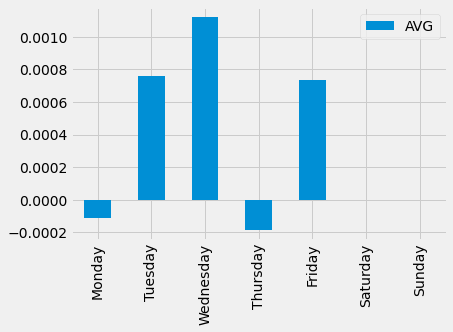

In [30]:
data_returns.plot.bar()

In [31]:
# show the returns
data_returns

,AVG
Monday,-0.000113
Tuesday,0.000757
Wednesday,0.001118
Thursday,-0.000183
Friday,0.000733
Saturday,0.000000
Sunday,0.000000
